# MTG Probabilities Analysis

This analysis try to outline some basic probabilities facts about Magic: The Gathering, such as probablity you will draw one of four copies of a card after a given number of turns, number of lands you play in average for different numbers of lands in your deck and other things that may give us some insight into how to play better, let's begin by explaining some rules about the game itself.

1. Each deck has 60 cards in it.
2. Other than basic lands, you may have up to 4 copies of a card in your deck.
3. You may play a single land during your turn.
4. You start with seven cards.

This rules are a simplification to makes things easier, so let's move on.  
Also, of course we could just use probabilities density functions and what-not to calculate all
these stuff, but we will try to just simulate card draws because it's way cooler.

In [4]:
import matplotlib.pyplot as plt
import random as rnd
import numpy as np
%matplotlib inline

In [10]:
#First let's make a function to generate decks of cards for us
def makeDeck(cards, amount):
    if (sum(amount) != 60):
        print("WARNING: Your deck has %d cards" % sum(amount))
    deck = []
    for c, a in zip(cards, amount):
        deck.extend([c]*a)
    return deck
# We pass to the function a list of labels for our cards and a list
# with the amount we want of each card, the labels may be anything we wish
# but we will use numbers for the sake of simplicity
# Note that we may use padding values for our cards since it doesn't 
# change the out comes, so there may be more than 4 copies of
# padding cards

# Land drop analysis

The first analysis is the land drop analysis, here we will try to find a good amount of lands for your deck, in real play this is will vary according with your deck's mana curve, but let's just ignore that for now.
Here is the idea:
1. Generate a deck with $L$ lands and $60-L$ padding cards
2. Shuffle it
3. Draw seven cards
4. Play $10$ turns
5. Plot Lands Played vs. Turn and Total Lands vs. Turn

Note that, since you can only play 1 land a turn, having a bunch of them in your hand is not a good thing
that's why we will plot the Total Lands vs. Turn

In [103]:
# Thsi functions will generate random metrics for a given number of lands in the deck
def generateMetrics(amountOfLands):
    #We label the lands as 1 so we can use the sum and cumsum functions
    #to calculate our metrics
    lands_deck = makeDeck([0,1],[60-L[0], L[0]])
    #Shuffle It
    rnd.shuffle(lands_deck)
    #First Hand
    starting_hand = lands_deck[:7]
    #Let's just look at the first 10 draws
    lands_deck = lands_deck[7:17]
    #The amount of lands in our opening hand
    starting_lands = sum(starting_hand)
    # Whenver we draw a land, we play it, so the 
    # number of played lands per turn is the
    # cumulative sum of lands draw + any lands that may be on our hand
    played = np.cumsum(lands_deck)
    used = 0
    # Counting how many lands in hand in each turn
    in_hand = np.array([starting_lands] * 10)
    for i in range(len(played)):
        p = played[i]
        if used == starting_lands: break
        #If we missed our land in the draw
        if (i==0 and p==0) or (i>0 and p==played[i-1]):
            # We play a land from our hand
            played = np.concatenate((played[:i],played[i:]+1))
            in_hand = np.concatenate((in_hand[:i], in_hand[i:]-1))
            used += 1
    #print("Started with %d lands and missed %d drops while using %d lands" % (starting_lands, 
                                                                         #     10-played[-1], amountOfLands))
    return (starting_lands, played, in_hand)

_, played, in_hand = generateMetrics(20)

In [129]:
# Now let's generate 100 sample for 3 different values of L and see how they beahve in average
L = [18,20,22]
samples = 5000
results = {18:{}, 20:{}, 22:{}}
for l in L:
    cum_played = np.array([0] * 10)
    cum_hand = np.array([0] * 10)
    cum_start = 0
    for i in range(samples):
        start,played,hand = generateMetrics(l)
        cum_start += start
        cum_played += played
        cum_hand += hand
    results[l]['cum_hand'] = cum_hand
    results[l]['cum_played'] = cum_played
    results[l]['cum_start'] = cum_start
    print(results[l])

{'cum_start': 10601, 'cum_hand': array([7313, 4664, 2674, 1362,  650,  266,   98,   28,    8,    4]), 'cum_played': array([ 4762,  8971, 12503, 15264, 17445, 19311, 20955, 22469, 23991, 25500])}
{'cum_start': 10489, 'cum_hand': array([7139, 4425, 2481, 1266,  581,  240,   79,   30,    7,    0]), 'cum_played': array([ 4777,  9003, 12449, 15147, 17336, 19163, 20796, 22393, 23962, 25448])}
{'cum_start': 10514, 'cum_hand': array([7268, 4529, 2571, 1331,  608,  247,   91,   27,    5,    1]), 'cum_played': array([ 4770,  8980, 12408, 15174, 17366, 19235, 20871, 22445, 23997, 25498])}


In [130]:
def makeLandsPlot(amountOfLands):
    data = results[amountOfLands]
    avg_played = data['cum_played']/samples
    avg_hand = data['cum_hand']/samples
    avg_start = data['cum_start']/samples
    plt.title("Lands Played vs Turn (%d Lands)" % amountOfLands)
    plt.xlabel("Turn")
    plt.ylabel("Lands Played")
    plt.xlim(1, 10)
    plt.ylim(1, 10)
    plt.yticks([i for i in range(1,11)])
    plt.plot([i for i in range(1,11)], avg_played)
    plt.plot([i for i in range(1,11)], avg_hand)
    plt.legend(["Lands Played", "Lands in Hand"])

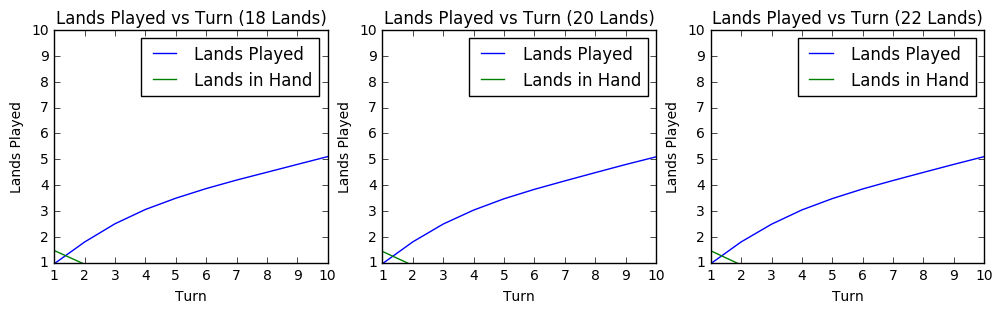

In [131]:
plt.figure(figsize=(12,3))
plt.subplot(131)
makeLandsPlot(18)
plt.subplot(132)
makeLandsPlot(20)
plt.subplot(133)
makeLandsPlot(22)